<a href="https://colab.research.google.com/github/tauqeer7328/Global-Developmental-Delay-Syndrome-Detection-using-Machine-Learning/blob/main/Development_Delay_in_child_using_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
developmentdelay_df = pd.read_csv('/content/Results.DevelopmentalDelayintheAmazon.xlsx - Sheet 1.csv')

In [ ]:
developmentdelay_df.head()

,ID,Community,District,Age,Sex,Age of Mother at birth,number of children,Age at first birth of mother,education,ocupaction,...,DIT Preg 10,Cutoff Comm,Cutoff Motora Gruesa,Deficiencia Comm,Deficiencia Motora Gruesa,Nivel de Deficiencia,developmentaldelay,water,water treatment,electricity hours
0,2,Bufeo Pozo,Sepahua,39.0,0.0,26.0,4,16.0,2,1,...,1,30.99,36.99,0.0,0.0,0.0,0.0,1,1,3.0
1,3,Bufeo Pozo,Sepahua,37.0,0.0,25.0,2,17.0,3,1,...,1,30.99,36.99,1.0,0.0,1.0,1.0,1,1,3.0
2,4,Bufeo Pozo,Sepahua,15.0,1.0,21.0,3,15.0,3,1,...,0,13.06,37.38,0.0,0.0,0.0,0.0,1,1,3.0
3,5,Bufeo Pozo,Sepahua,19.0,1.0,39.0,5,15.0,2,1,...,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0
4,6,Bufeo Pozo,Sepahua,20.0,1.0,17.0,1,17.0,4,1,...,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0


In [ ]:
print(developmentdelay_df.head())

   ID   Community District   Age  Sex  Age of Mother at birth  \
0   2  Bufeo Pozo  Sepahua  39.0  0.0                    26.0   
1   3  Bufeo Pozo  Sepahua  37.0  0.0                    25.0   
2   4  Bufeo Pozo  Sepahua  15.0  1.0                    21.0   
3   5  Bufeo Pozo  Sepahua  19.0  1.0                    39.0   
4   6  Bufeo Pozo  Sepahua  20.0  1.0                    17.0   

  number of children  Age at first birth of mother  education ocupaction  ...  \
0                  4                          16.0          2          1  ...   
1                  2                          17.0          3          1  ...   
2                  3                          15.0          3          1  ...   
3                  5                          15.0          2          1  ...   
4                  1                          17.0          4          1  ...   

   DIT Preg 10  Cutoff Comm  Cutoff Motora Gruesa  Deficiencia Comm  \
0            1        30.99                 36.99  

In [ ]:
developmentdelay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            603 non-null    int64  
 1   Community                     603 non-null    object 
 2   District                      603 non-null    object 
 3   Age                           601 non-null    float64
 4   Sex                           600 non-null    float64
 5   Age of Mother at birth        599 non-null    float64
 6   number of children            572 non-null    object 
 7   Age at first birth of mother  599 non-null    float64
 8   education                     603 non-null    int64  
 9   ocupaction                    599 non-null    object 
 10  toilet                        603 non-null    int64  
 11  radio                         603 non-null    int64  
 12  television                    603 non-null    int64  
 13  cellu

In [ ]:
developmentdelay_df.isnull().sum()

ID                                0
Community                         0
District                          0
Age                               2
Sex                               3
Age of Mother at birth            4
number of children               31
Age at first birth of mother      4
education                         0
ocupaction                        4
toilet                            0
radio                             0
television                        0
cellular                          2
economy                           0
maternal vitimans                 0
illness during prenancy           3
illness of child                  3
diarrea days                      0
CRED                              0
location of birth                 0
birth weight                      9
Breastfed cleaned               188
breastfed months                  7
exclusive breastfed age          98
micronutrients cleaned          161
micronutrients months             5
CHA visits                  

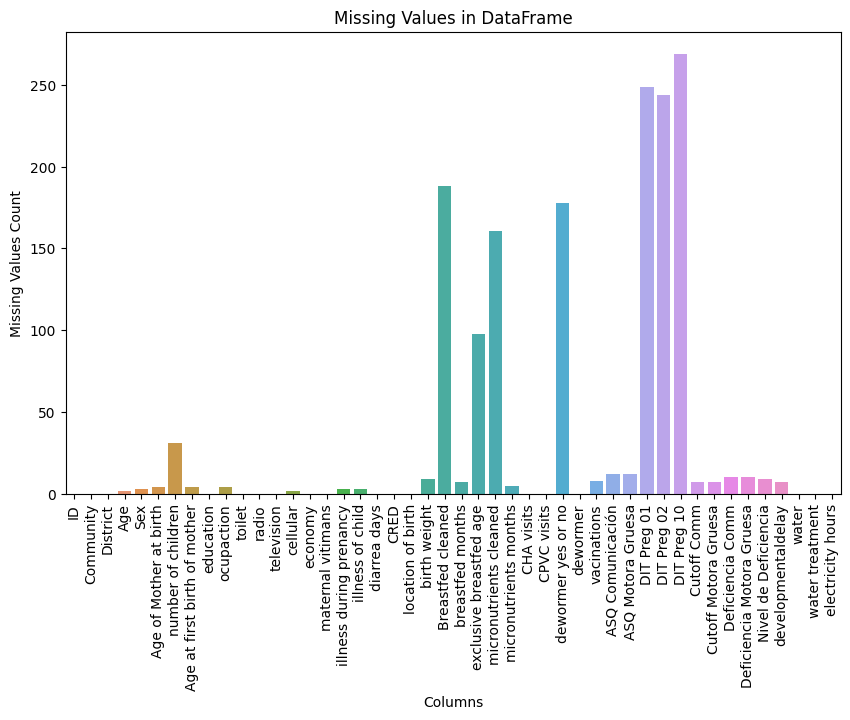

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=developmentdelay_df.columns, y=developmentdelay_df.isnull().sum())
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

In [ ]:
# numeric_columns = ['number of children', 'birth weight', 'breastfed months', 'exclusive breastfed age',
#                    'micronutrients months', 'ASQ Comunicación', 'ASQ Motora Gruesa', 'DIT Preg 01', 'DIT Preg 02',
#                    'DIT Preg 10', 'Cutoff Comm', 'Cutoff Motora Gruesa', 'Deficiencia Comm',
#                    'Deficiencia Motora Gruesa', 'Nivel de Deficiencia', 'developmentaldelay']
# developmentdelay_df[numeric_columns] = developmentdelay_df[numeric_columns].fillna(developmentdelay_df[numeric_columns].median())

# # Categorical columns: Replace missing values with the mode
# categorical_columns = ['number of children', 'ASQ Comunicación', 'ASQ Motora Gruesa', 'Cutoff Comm',
#                        'Cutoff Motora Gruesa', 'Deficiencia Comm', 'Deficiencia Motora Gruesa',
#                        'Nivel de Deficiencia', 'developmentaldelay']
# developmentdelay_df[categorical_columns] = developmentdelay_df[categorical_columns].fillna(developmentdelay_df[categorical_columns].mode().iloc[0])



In [ ]:
mean_age = developmentdelay_df['Age'].mean()
developmentdelay_df['Age'].fillna(mean_age, inplace=True)

In [ ]:
mode_sex = developmentdelay_df['Sex'].mode()[0]
developmentdelay_df['Sex'].fillna(mode_sex, inplace=True)

In [ ]:
median_age = developmentdelay_df['Age of Mother at birth'].median()
developmentdelay_df['Age of Mother at birth'].fillna(median_age, inplace=True)

In [ ]:
mean_age_first_birth = developmentdelay_df['Age at first birth of mother'].mean()
median_age_first_birth = developmentdelay_df['Age at first birth of mother'].median()
developmentdelay_df['Age at first birth of mother'].fillna(mean_age_first_birth, inplace=True)  # or median_age_first_birth

In [ ]:
mode_occupation = developmentdelay_df['ocupaction'].mode()[0]
developmentdelay_df['ocupaction'].fillna(mode_occupation, inplace=True)

In [ ]:
mode_cellular = developmentdelay_df['cellular'].mode()[0]
developmentdelay_df['cellular'].fillna(mode_cellular, inplace=True)

In [ ]:
mode_illness = developmentdelay_df['illness during prenancy'].mode()[0]
developmentdelay_df['illness during prenancy'].fillna(mode_illness, inplace=True)

In [ ]:
mode_illness = developmentdelay_df['illness of child'].mode()[0]
developmentdelay_df['illness of child'].fillna(mode_illness, inplace=True)

In [ ]:
developmentdelay_df['birth weight'] = pd.to_numeric(developmentdelay_df['birth weight'], errors='coerce')

# Replace missing values in the "birth weight" column
mean_weight = developmentdelay_df['birth weight'].mean()
developmentdelay_df['birth weight'].fillna(mean_weight, inplace=True)

In [ ]:
mode_breastfed = developmentdelay_df['Breastfed cleaned'].mode()[0]
developmentdelay_df['Breastfed cleaned'].fillna(mode_breastfed, inplace=True)

In [ ]:
mode_breastfed = developmentdelay_df['Breastfed cleaned'].mode()[0]
developmentdelay_df['Breastfed cleaned'].fillna(mode_breastfed, inplace=True)

In [ ]:
developmentdelay_df['breastfed months'] = pd.to_numeric(developmentdelay_df['breastfed months'], errors='coerce')

# Replace missing values in the "breastfed months" column
mean_months = developmentdelay_df['breastfed months'].mean()
developmentdelay_df['breastfed months'].fillna(mean_months, inplace=True)

In [ ]:
developmentdelay_df['exclusive breastfed age'] = pd.to_numeric(developmentdelay_df['exclusive breastfed age'], errors='coerce')

# Replace missing values in the "exclusive breastfed age" column
mean_age = developmentdelay_df['exclusive breastfed age'].mean()
developmentdelay_df['exclusive breastfed age'].fillna(mean_age, inplace=True)

In [ ]:
# Replace missing values in the "micronutrients cleaned" column with the mode
mode_micronutrients = developmentdelay_df['micronutrients cleaned'].mode()[0]
developmentdelay_df['micronutrients cleaned'].fillna(mode_micronutrients, inplace=True)


In [ ]:
# Convert "micronutrients months" column to numeric data type
developmentdelay_df['micronutrients months'] = pd.to_numeric(developmentdelay_df['micronutrients months'], errors='coerce')

# Replace missing values in the "micronutrients months" column
mean_months = developmentdelay_df['micronutrients months'].mean()
developmentdelay_df['micronutrients months'].fillna(mean_months, inplace=True)


In [ ]:
# Replace missing values in the "dewormer yes or no" column with the mode
mode_dewormer = developmentdelay_df['dewormer yes or no'].mode()[0]
developmentdelay_df['dewormer yes or no'].fillna(mode_dewormer, inplace=True)


In [ ]:
#vacinations
# Replace missing values in the "vaccinations" column with the mode
mode_vaccinations = developmentdelay_df['vacinations'].mode()[0]
developmentdelay_df['vacinations'].fillna(mode_vaccinations, inplace=True)


In [ ]:
# Replace missing values in the "DIT Preg 02" column with the mode
mode_dit_preg_02 = developmentdelay_df['DIT Preg 02'].mode()[0]
developmentdelay_df['DIT Preg 02'].fillna(mode_dit_preg_02, inplace=True)

In [ ]:
# Replace missing values in the "DIT Preg 10" column with the mode
mode_dit_preg_10 = developmentdelay_df['DIT Preg 10'].mode()[0]
developmentdelay_df['DIT Preg 10'].fillna(mode_dit_preg_10, inplace=True)

In [ ]:
# Replace missing values in the columns with the mean value
mean_asq_comunicacion = developmentdelay_df['ASQ Comunicación'].mean()
mean_asq_motora_gruesa = developmentdelay_df['ASQ Motora Gruesa'].mean()
mean_dit_preg_01 = developmentdelay_df['DIT Preg 01'].mean()

developmentdelay_df['ASQ Comunicación'].fillna(mean_asq_comunicacion, inplace=True)
developmentdelay_df['ASQ Motora Gruesa'].fillna(mean_asq_motora_gruesa, inplace=True)
developmentdelay_df['DIT Preg 01'].fillna(mean_dit_preg_01, inplace=True)


In [ ]:
# Replace missing values in the columns with the mean value
mean_cutoff_comm = developmentdelay_df['Cutoff Comm'].mean()
mean_cutoff_motora_gruesa = developmentdelay_df['Cutoff Motora Gruesa'].mean()
mean_deficiencia_comm = developmentdelay_df['Deficiencia Comm'].mean()
mean_deficiencia_motora_gruesa = developmentdelay_df['Deficiencia Motora Gruesa'].mean()
mean_nivel_deficiencia = developmentdelay_df['Nivel de Deficiencia'].mean()
mean_developmentaldelay = developmentdelay_df['developmentaldelay'].mean()

developmentdelay_df['Cutoff Comm'].fillna(mean_cutoff_comm, inplace=True)
developmentdelay_df['Cutoff Motora Gruesa'].fillna(mean_cutoff_motora_gruesa, inplace=True)
developmentdelay_df['Deficiencia Comm'].fillna(mean_deficiencia_comm, inplace=True)
developmentdelay_df['Deficiencia Motora Gruesa'].fillna(mean_deficiencia_motora_gruesa, inplace=True)
developmentdelay_df['Nivel de Deficiencia'].fillna(mean_nivel_deficiencia, inplace=True)
developmentdelay_df['developmentaldelay'].fillna(mean_developmentaldelay, inplace=True)


In [ ]:
# Convert "number of children" column to numeric data type
developmentdelay_df['number of children'] = pd.to_numeric(developmentdelay_df['number of children'], errors='coerce')

# Replace missing values in the "number of children" column
mean_children = developmentdelay_df['number of children'].mean()
developmentdelay_df['number of children'].fillna(mean_children, inplace=True)


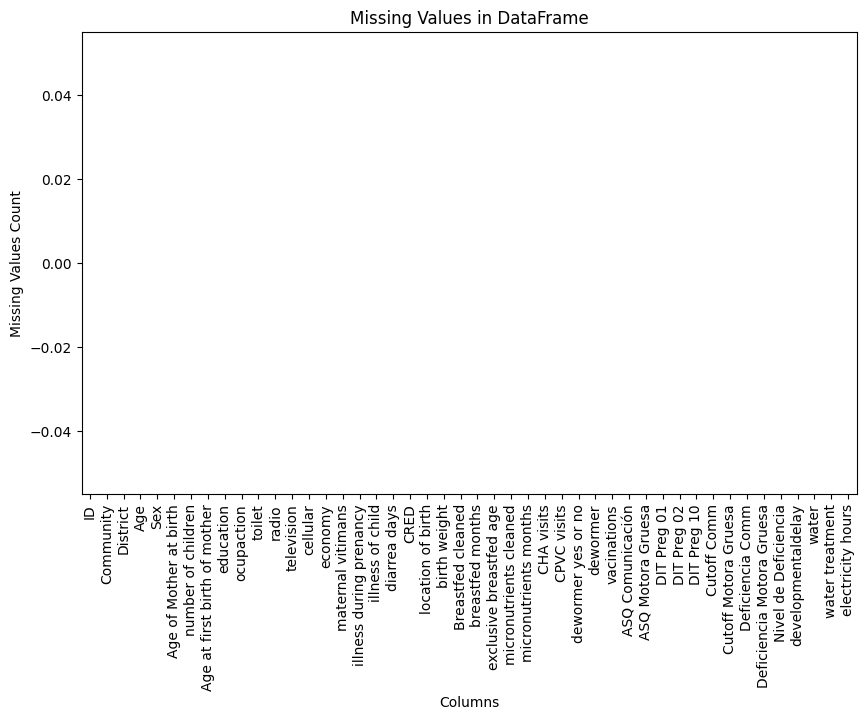

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=developmentdelay_df.columns, y=developmentdelay_df.isnull().sum())
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

In [ ]:
developmentdelay_df.isnull().sum()

ID                              0
Community                       0
District                        0
Age                             0
Sex                             0
Age of Mother at birth          0
number of children              0
Age at first birth of mother    0
education                       0
ocupaction                      0
toilet                          0
radio                           0
television                      0
cellular                        0
economy                         0
maternal vitimans               0
illness during prenancy         0
illness of child                0
diarrea days                    0
CRED                            0
location of birth               0
birth weight                    0
Breastfed cleaned               0
breastfed months                0
exclusive breastfed age         0
micronutrients cleaned          0
micronutrients months           0
CHA visits                      0
CPVC visits                     0
dewormer yes o

In [ ]:
developmentdelay_df = developmentdelay_df.drop(['Community', 'District', 'ID'],axis=1)

In [ ]:
# Define the list of column names you want to include in X
columns_to_include = [
    'Age',
    'maternal vitimans',
    'illness during prenancy',
    'birth weight',
    'Breastfed cleaned',
    'vacinations',
    'ASQ Comunicación',
    'ASQ Motora Gruesa',
    'Cutoff Comm',
    'Cutoff Motora Gruesa'
]

# Create the X DataFrame with only the selected columns
X = developmentdelay_df[columns_to_include]


In [ ]:
y = developmentdelay_df[['Cutoff Comm', 'Cutoff Motora Gruesa', 'developmentaldelay']]

In [ ]:
# Perform one-hot encoding on categorical features
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,Age,maternal vitimans,birth weight,Breastfed cleaned,ASQ Comunicación,ASQ Motora Gruesa,Cutoff Comm,Cutoff Motora Gruesa,illness during prenancy_1,illness during prenancy_2,...,illness during prenancy_infeccion orinria,illness during prenancy_infeccion urinaria,illness during prenancy_infecciones orinario,illness during prenancy_infección urinaria,illness during prenancy_infecion,illness during prenancy_toz,vacinations_1,vacinations_5,vacinations_ns,vacinations_x
0,39.0,2,2.800000,6.0,45.0,60.0,30.99,36.99,0,0,...,0,0,0,0,0,0,1,0,0,0
1,37.0,3,3.112641,6.0,25.0,60.0,30.99,36.99,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.0,0,3.112641,12.0,35.0,40.0,13.06,37.38,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19.0,0,3.000000,12.0,50.0,40.0,20.50,39.89,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20.0,6,3.600000,12.0,55.0,60.0,20.50,39.89,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,Cutoff Comm,Cutoff Motora Gruesa,developmentaldelay
0,30.99,36.99,0.0
1,30.99,36.99,1.0
2,13.06,37.38,0.0
3,20.50,39.89,0.0
4,20.50,39.89,0.0


In [ ]:
# column_names = ['Cutoff Comm', 'Cutoff Motora Gruesa', 'developmentaldelay']
# column_indices = [0, 1, 2]  # Assuming the column indices of 'Cutoff Comm', 'Cutoff Motora Gruesa', and 'developmentaldelay' are 0, 1, and 2 respectively

# y_cutoff_comm = y[:, column_indices[0]]
# y_cutoff_motora_gruesa = y[:, column_indices[1]]
# y_developmentaldelay = y[:, column_indices[2]]

# import pandas as pd

# Assuming you have a DataFrame named 'df' and 'y' contains the data
column_names = ['Cutoff Comm', 'Cutoff Motora Gruesa', 'developmentaldelay']
column_indices = [0, 1, 2]

# Assuming 'y' is your DataFrame
y_cutoff_comm = y.iloc[:, column_indices[0]]
y_cutoff_motora_gruesa = y.iloc[:, column_indices[1]]
y_developmentaldelay = y.iloc[:, column_indices[2]]


In [ ]:
# Split the data into training and testing sets for each target variable
# X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_comm, X_test_comm, y_train_comm, y_test_comm = train_test_split(X, y_cutoff_comm, test_size=0.2, random_state=42)
X_train_motora, X_test_motora, y_train_motora, y_test_motora = train_test_split(X, y_cutoff_motora_gruesa, test_size=0.2, random_state=42)
X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(X, y_developmentaldelay, test_size=0.2, random_state=42)

In [ ]:
# Instantiate and fit separate Logistic Regression models for each target variable
model_comm = RandomForestRegressor(n_estimators = 100, random_state=42)
model_motora = RandomForestRegressor(n_estimators = 100, random_state=42)
model_delay = RandomForestRegressor(n_estimators = 100, random_state=42)

In [ ]:
model_comm.fit(X_train_comm, y_train_comm)
model_motora.fit(X_train_motora, y_train_motora)
model_delay.fit(X_train_delay, y_train_delay)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test sets for each target variable
y_pred_comm = model_comm.predict(X_test_comm)
y_pred_motora = model_motora.predict(X_test_motora)
y_pred_delay = model_delay.predict(X_test_delay)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error (MSE)
mse_comm = mean_squared_error(y_test_comm, y_pred_comm)
mse_motora = mean_squared_error(y_test_motora, y_pred_motora)
mse_delay = mean_squared_error(y_test_delay, y_pred_delay)

print("Mean Squared Error (Cutoff Comm):", mse_comm)
print("Mean Squared Error (Cutoff Motora Gruesa):", mse_motora)
print("Mean Squared Error (developmentaldelay):", mse_delay)

Mean Squared Error (Cutoff Comm): 0.00063504018017179
Mean Squared Error (Cutoff Motora Gruesa): 3.209275754822334e-05
Mean Squared Error (developmentaldelay): 0.01810111472158391


The mean squared error (MSE) is a commonly used metric in regression tasks to evaluate the performance of a regression model. It measures the average of the squared differences between the true labels and the predicted labels.

A lower MSE value indicates better performance, as it reflects smaller differences between the true labels and the predicted labels. In other words, a lower MSE value suggests that the model's predictions are closer to the actual values.

To evaluate with new input data

In [ ]:

# new_input_data_df = pd.DataFrame([new_data])
# y_pred_comm = model_comm.predict(new_data_df)
# y_pred_motora = model_motora.predict(new_data_df)
# y_pred_delay = model_delay.predict(new_data_df)
